## Import

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.cross_validation import cross_val_score

In [3]:
import os
import fnmatch
import itertools
import time
import numpy as np
import pandas as pd

### Libraries for plotting 
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
from skimage import io,data,color,exposure,transform
from skimage.color import rgb2gray, gray2rgb
from skimage.transform import rescale, resize, downscale_local_mean

## Load training data

In [4]:
data=np.load("data.npz")
data_X=data["data_X"]
data_Y=data["data_Y"]

## Check Loading data

In [7]:
data_X.shape

(2527, 16384)

In [10]:
data_Y.shape

(2527,)

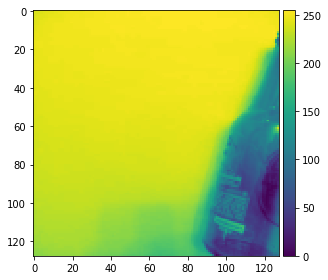

In [22]:
x_shape=128
y_shape=128
example=data_X[1,:]
sk_image=example.reshape(x_shape,y_shape).T
io.imshow(sk_image)

## Split Training Data

In [24]:
X_train, X_valid, y_train, y_valid = train_test_split(data_X, data_Y, test_size=0.2, random_state=42)

## Random Forest Model

In [48]:
def rft_model(X_train, y_train, X_valid, y_valid):
    train_model = RandomForestClassifier(n_estimators = 100, max_depth = 7)
    train_model.fit(X_train, y_train)
    training_score=accuracy_score(y_train,train_model.predict(X_train))
    print("Training Accuracy Score:", training_score)
    predicted_labels = train_model.predict(X_valid)
    validation_score = accuracy_score(y_valid,predicted_labels)
    print("Validation Accuracy Score:", validation_score)
    cm = confusion_matrix(y_valid, predicted_labels)
    return cm,train_model

In [49]:
%%time
conf_matrix, rft_model = rft_model(X_train, y_train, X_valid, y_valid)

Training Accuracy Score: 0.8634339435922811
Validation Accuracy Score: 0.5158102766798419
Wall time: 17.3 s


## PostProcessing

In [30]:
import seaborn as sns; sns.set()

Text(0.5,1,'Confusion matrix')

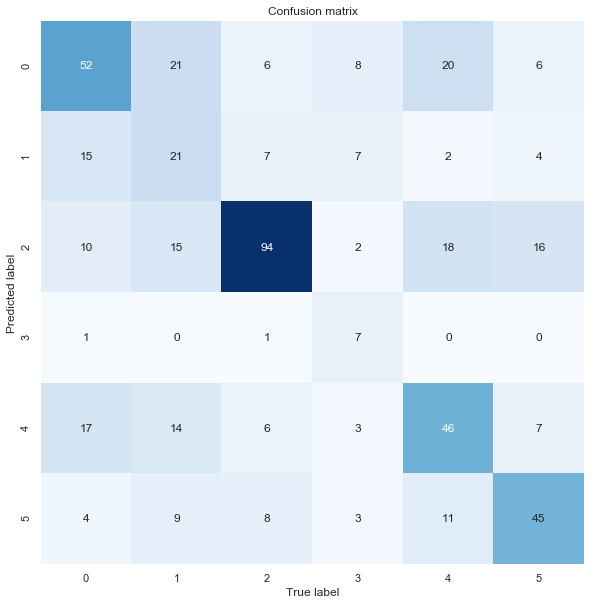

In [39]:
plt.figure(figsize = (15,10))
sns.heatmap(conf_matrix.T,square=True, annot=True,fmt="d",cmap=plt.cm.Blues,cbar=False)
plt.xlabel("True label")
plt.ylabel("Predicted label")
plt.title("Confusion matrix")

## Export Model 

In [52]:
from joblib import dump, load

In [54]:
dump(rft_model,"waste_classfication_rft.model")

['waste_classfication_rft.model']

## Try Model 

In [69]:
model=load("waste_classfication_rft.model")

In [ ]:
waste_name = ['glass', 'metal', 'paper', 'trash', 'plastic', 'cardboard']
from image_processing_lib import batch_process
image_folder="waste\\"
example=image_folder+"glass\\glass1.jpg"
example_image_jpg = io.imread(example)
io.imshow(example_image_jpg)
example_image_array = batch_process(example).reshape(1,-1)
print("array shape: ",example_image_array.shape)

In [70]:
pred=model.predict(example_image_array)[0]
print("the predict class is ", pred)
print("the predict img is ", waste_name[pred])

the predict class is  0
the predict img is  glass
